## importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## importing data set

In [2]:
df=pd.read_csv('admission_predict.csv')
print(df)

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
495         496        332          108                  5  4.5   4.0  9.02   
496         497        337          117                  5  5.0   5.0  9.87   
497         498        330          120                  5  4.5   5.0  9.56   
498         499        312          103                  4  4.0   5.0  8.43   
499         500        327          113                  4  4.5   4.5  9.04   

     Research  Chance of Admit   
0           1    

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
#axis=1 for columns 
#inplace=true to effect change
df.drop('Serial No.',axis=1,inplace=True)

In [7]:
print(df)

     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0          337          118                  4  4.5   4.5  9.65         1   
1          324          107                  4  4.0   4.5  8.87         1   
2          316          104                  3  3.0   3.5  8.00         1   
3          322          110                  3  3.5   2.5  8.67         1   
4          314          103                  2  2.0   3.0  8.21         0   
..         ...          ...                ...  ...   ...   ...       ...   
495        332          108                  5  4.5   4.0  9.02         1   
496        337          117                  5  5.0   5.0  9.87         1   
497        330          120                  5  4.5   5.0  9.56         1   
498        312          103                  4  4.0   5.0  8.43         0   
499        327          113                  4  4.5   4.5  9.04         0   

     Chance of Admit   
0                0.92  
1                0.76  
2  

## extracting x and y

In [8]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [9]:
print(x)

[[337.   118.     4.   ...   4.5    9.65   1.  ]
 [324.   107.     4.   ...   4.5    8.87   1.  ]
 [316.   104.     3.   ...   3.5    8.     1.  ]
 ...
 [330.   120.     5.   ...   5.     9.56   1.  ]
 [312.   103.     4.   ...   5.     8.43   0.  ]
 [327.   113.     4.   ...   4.5    9.04   0.  ]]


In [10]:
print(y)

[0.92 0.76 0.72 0.8  0.65 0.9  0.75 0.68 0.5  0.45 0.52 0.84 0.78 0.62
 0.61 0.54 0.66 0.65 0.63 0.62 0.64 0.7  0.94 0.95 0.97 0.94 0.76 0.44
 0.46 0.54 0.65 0.74 0.91 0.9  0.94 0.88 0.64 0.58 0.52 0.48 0.46 0.49
 0.53 0.87 0.91 0.88 0.86 0.89 0.82 0.78 0.76 0.56 0.78 0.72 0.7  0.64
 0.64 0.46 0.36 0.42 0.48 0.47 0.54 0.56 0.52 0.55 0.61 0.57 0.68 0.78
 0.94 0.96 0.93 0.84 0.74 0.72 0.74 0.64 0.44 0.46 0.5  0.96 0.92 0.92
 0.94 0.76 0.72 0.66 0.64 0.74 0.64 0.38 0.34 0.44 0.36 0.42 0.48 0.86
 0.9  0.79 0.71 0.64 0.62 0.57 0.74 0.69 0.87 0.91 0.93 0.68 0.61 0.69
 0.62 0.72 0.59 0.66 0.56 0.45 0.47 0.71 0.94 0.94 0.57 0.61 0.57 0.64
 0.85 0.78 0.84 0.92 0.96 0.77 0.71 0.79 0.89 0.82 0.76 0.71 0.8  0.78
 0.84 0.9  0.92 0.97 0.8  0.81 0.75 0.83 0.96 0.79 0.93 0.94 0.86 0.79
 0.8  0.77 0.7  0.65 0.61 0.52 0.57 0.53 0.67 0.68 0.81 0.78 0.65 0.64
 0.64 0.65 0.68 0.89 0.86 0.89 0.87 0.85 0.9  0.82 0.72 0.73 0.71 0.71
 0.68 0.75 0.72 0.89 0.84 0.93 0.93 0.88 0.9  0.87 0.86 0.94 0.77 0.78
 0.73 

## feature scalling on x

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
np.set_printoptions(suppress=True)
print(x)

[[ 1.81923762  1.77886545  0.77558214 ...  1.09894429  1.77680627
   0.88640526]
 [ 0.66714832 -0.03160087  0.77558214 ...  1.09894429  0.48585943
   0.88640526]
 [-0.0418297  -0.52536441 -0.09979274 ...  0.01730621 -0.95404281
   0.88640526]
 ...
 [ 1.19888185  2.10804114  1.65095702 ...  1.63976333  1.62785086
   0.88640526]
 [-0.39631872 -0.68995225  0.77558214 ...  1.63976333 -0.24236699
  -1.12815215]
 [ 0.93301508  0.95592621  0.77558214 ...  1.09894429  0.76721964
  -1.12815215]]


## splitting x and y

In [12]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.2,random_state=0)

## create and train linear regression model

In [13]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_tr,y_tr)

LinearRegression()

## predicting the values using x_test to test our model

In [14]:
y_pr=lr.predict(x_te)
print(y_pr)

[0.6606252  0.83467888 0.77803235 0.88054515 0.60126564 0.64356569
 0.53081352 0.69581338 0.52494695 0.74711904 0.61091713 0.70857888
 0.62202889 0.75371215 0.88455163 0.50857541 0.82439288 0.64614159
 0.7656139  0.53346257 0.51561087 0.72319839 0.52118775 0.92174074
 0.8332172  0.72651112 0.69865521 0.50871376 0.58246086 0.59618334
 0.72743587 0.48564416 0.65331018 0.8414552  0.56459962 0.59803765
 0.84391714 0.86746389 0.59031772 0.65993134 0.67020768 0.90220251
 0.86565391 0.72223457 0.77319666 0.8068659  0.97014963 0.85112801
 0.6429692  0.65569499 0.63193629 0.6367591  0.61353916 0.80117655
 0.6942999  0.85574591 0.52489959 0.86276624 0.60022041 0.63653589
 0.49798224 0.90699384 0.61965598 0.94547309 0.7196482  0.61602013
 0.73614278 0.8434937  0.519103   0.77895777 0.8947432  0.78381774
 0.69730948 0.63992055 0.78922356 0.916447   0.7522116  0.72918547
 0.55987804 0.66139049 0.59504557 0.8592551  0.55418168 0.67073234
 0.76931897 0.55440527 0.81743067 0.61916368 0.4583537  0.6601

## checking for mae,mse,r2_score

In [15]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
mse=mean_squared_error(y_te,y_pr)
mae=mean_absolute_error(y_te,y_pr)
r2=r2_score(y_te,y_pr)
print(mse)
print(mae)
print(r2)

0.004079680034602106
0.04825389374865475
0.7664048993199384


## combination of columns

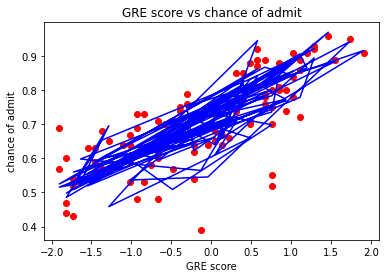

In [16]:
#creating graph between GRE score and chance of admit
plt.scatter(x_te[:,0],y_te,color='red')
plt.plot(x_te[:,0],y_pr,color='blue')
plt.title('GRE score vs chance of admit')
plt.xlabel('GRE score')
plt.ylabel('chance of admit')
plt.show()

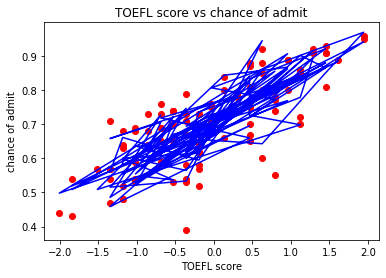

In [17]:
#creating graph between TOEFL score and chance of admit
plt.scatter(x_te[:,1],y_te,color='red')
plt.plot(x_te[:,1],y_pr,color='blue')
plt.title('TOEFL score vs chance of admit')
plt.xlabel('TOEFL score')
plt.ylabel('chance of admit')
plt.show()

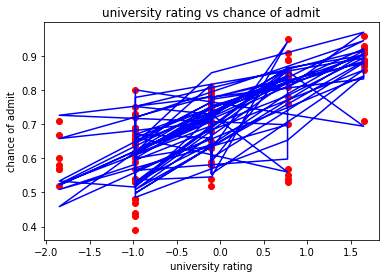

In [18]:
#creating graph between university rating and chance of admit
plt.scatter(x_te[:,2],y_te,color='red')
plt.plot(x_te[:,2],y_pr,color='blue')
plt.title('university rating vs chance of admit')
plt.xlabel('university rating')
plt.ylabel('chance of admit')
plt.show()

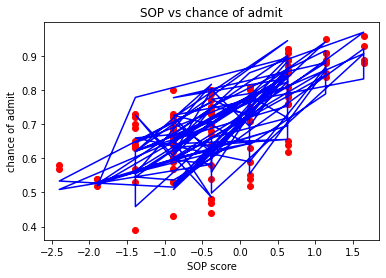

In [19]:
#creating graph between SOP and chance of admit
plt.scatter(x_te[:,3],y_te,color='red')
plt.plot(x_te[:,3],y_pr,color='blue')
plt.title('SOP vs chance of admit')
plt.xlabel('SOP score')
plt.ylabel('chance of admit')
plt.show()

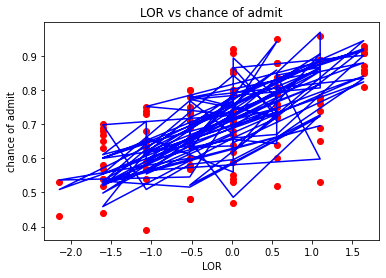

In [20]:
#creating graph between LOR and chance of admit
plt.scatter(x_te[:,4],y_te,color='red')
plt.plot(x_te[:,4],y_pr,color='blue')
plt.title('LOR vs chance of admit')
plt.xlabel('LOR')
plt.ylabel('chance of admit')
plt.show()

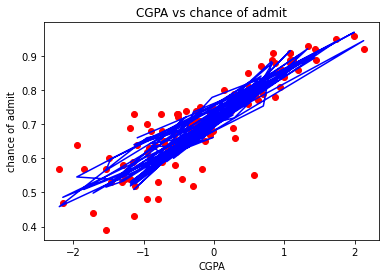

In [21]:
#creating graph between CGPA and chance of admit
plt.scatter(x_te[:,5],y_te,color='red')
plt.plot(x_te[:,5],y_pr,color='blue')
plt.title('CGPA vs chance of admit')
plt.xlabel('CGPA')
plt.ylabel('chance of admit')
plt.show()

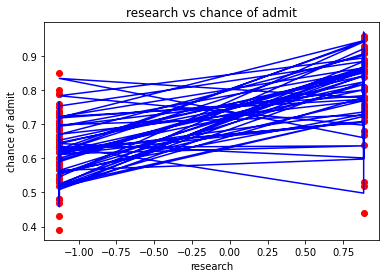

In [22]:
#creating graph between research and chance of admit
plt.scatter(x_te[:,6],y_te,color='red')
plt.plot(x_te[:,6],y_pr,color='blue')
plt.title('research vs chance of admit')
plt.xlabel('research')
plt.ylabel('chance of admit')
plt.show()

## plotting graph between y_te and y_pred

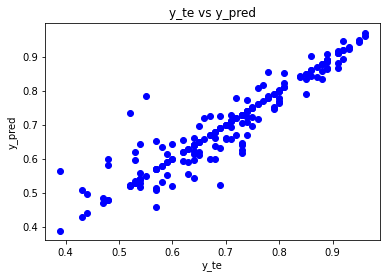

In [23]:
plt.scatter(y_te,y_te,color='blue')
plt.scatter(y_te,y_pr,color='blue')
plt.title('y_te vs y_pred')
plt.xlabel('y_te')
plt.ylabel('y_pred')
plt.show()